# Time warp

In [1]:
# Login
from omapy.api import oma

# API endpoint
url = "http://localhost:8080/"
# url = "http://omatest.eu-central-1.elasticbeanstalk.com/"
# Login with username, password and flag that indicates if certificates are validated or not. False: useful for non-production
login = oma.login(url, "oma", "=PSe?sZ-ymp6mE>2", False)
# response code 200
print(login)

<Response [200]>


In [2]:
recordingId1 = 35476
recordingId2 = 34669


params = {"recording": recordingId1, "type": "wav"}
audio_file1 = oma.recording_get_audio(params)
print(audio_file1.name)

params = {"recording": recordingId2, "type": "wav"}
audio_file2 = oma.recording_get_audio(params)
print(audio_file2.name)




opened
omacache/recording/35476.wav
opened
omacache/recording/34669.wav


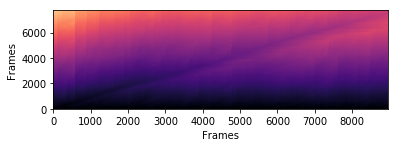

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_file1.name)
X = librosa.feature.chroma_cens(y=y, sr=sr)

y, sr = librosa.load(audio_file2.name)
Y = librosa.feature.chroma_cens(y=y, sr=sr)

D, wp = librosa.sequence.dtw(X, Y, subseq=True)

plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='frames', y_axis='frames')

plt.show()

In [ ]:
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='frames', y_axis='frames')
plt.title('Track alignment')
plt.plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(D[-1, :] / wp.shape[0])
plt.xlim([0, Y.shape[1]])
plt.ylim([0, 2])
plt.title('Matching cost function')
plt.tight_layout()
plt.show()

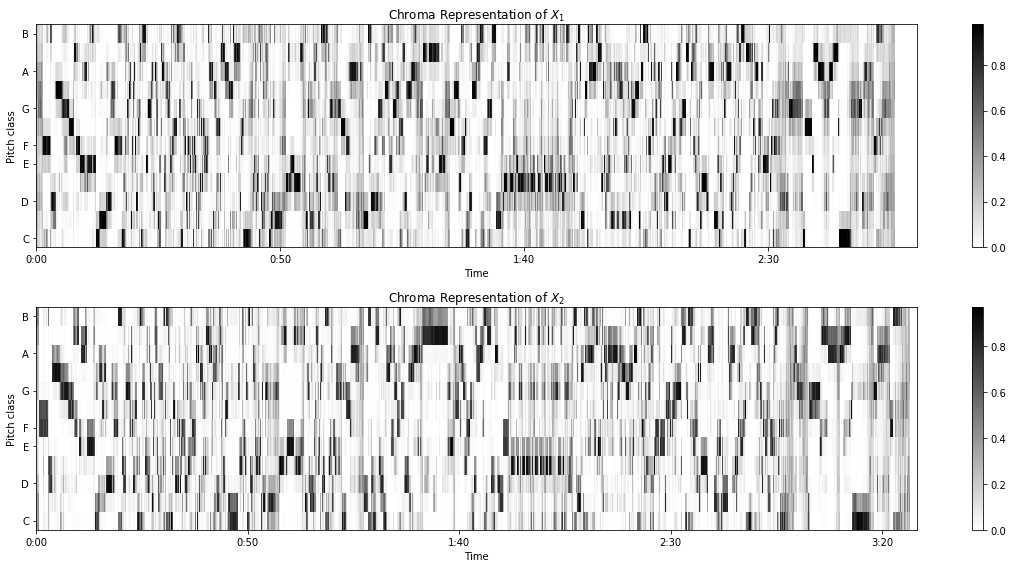

In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

n_fft = 4410
hop_size = 2205

x_1, sr = librosa.load(audio_file1.name)
x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=sr, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2, sr = librosa.load(audio_file2.name)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=sr, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)


plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Chroma Representation of $X_1$')
librosa.display.specshow(x_1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('Chroma Representation of $X_2$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

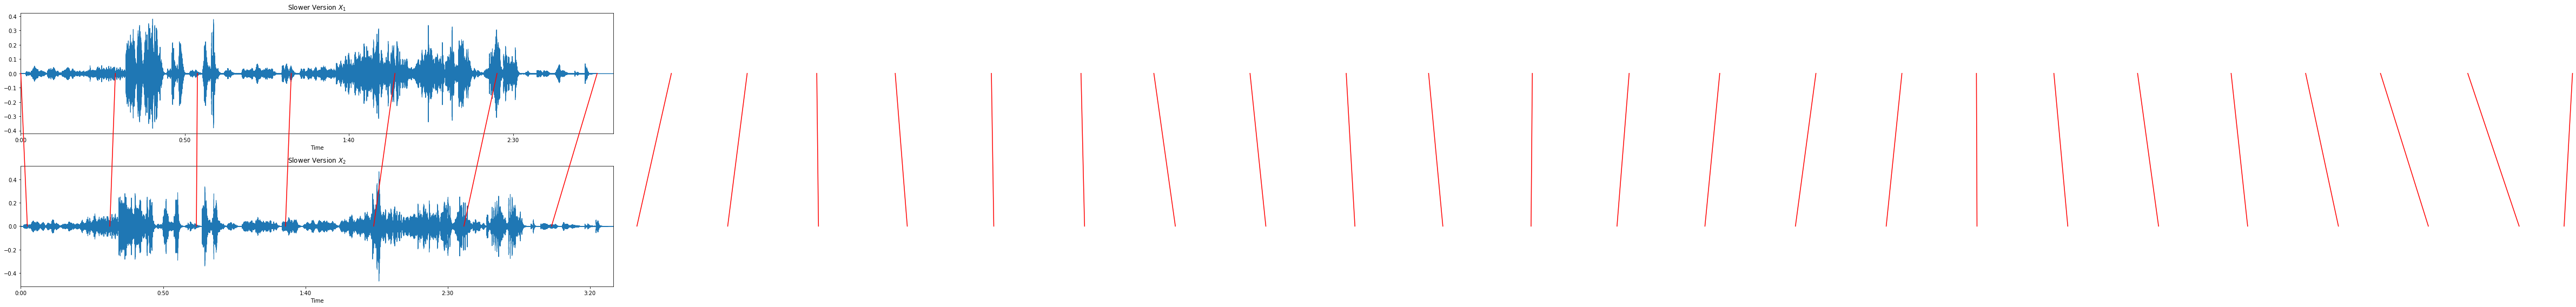

In [13]:
import matplotlib


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

# Plot x_1
librosa.display.waveplot(x_1, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')

# Plot x_2
librosa.display.waveplot(x_2, sr=sr, ax=ax2)
ax2.set(title='Slower Version $X_2$')

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / sr:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

plt.show()


In [14]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / sr

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

ParameterError: DTW cost matrix C has NaN values. 